I am a beginner in kaggle, and i learned much from everyone contributed his/her kernel publicly during in three month ago.  I express my sincere appreciations to all who help me.

This kernel, is just my notebook to summary what I have learned from all kernel publicly about the Titanic compitition. Thanks to** [Erik](https://www.kaggle.com/erikbruin/titanic-2nd-degree-families-and-majority-voting), [Chris](https://www.kaggle.com/cdeotte/titanic-using-name-only-0-81818/notebook)**.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('classic')
np.set_printoptions(precision=4)
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
train_set = pd.read_csv('data/train.csv')
test_set = pd.read_csv('data/test.csv')
display(train_set.sample(10))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
455,456,1,3,"Jalsevac, Mr. Ivan",male,29.0,0,0,349240,7.8958,NaN,C
393,394,1,1,"Newell, Miss. Marjorie",female,23.0,1,0,35273,113.2750,D36,C
642,643,0,3,"Skoog, Miss. Margit Elizabeth",female,2.0,3,2,347088,27.9000,NaN,S
523,524,1,1,"Hippach, Mrs. Louis Albert (Ida Sophia Fischer)",female,44.0,0,1,111361,57.9792,B18,C
203,204,0,3,"Youseff, Mr. Gerious",male,45.5,0,0,2628,7.2250,NaN,C
318,319,1,1,"Wick, Miss. Mary Natalie",female,31.0,0,2,36928,164.8667,C7,S
778,779,0,3,"Kilgannon, Mr. Thomas J",male,NaN,0,0,36865,7.7375,NaN,Q
651,652,1,2,"Doling, Miss. Elsie",female,18.0,0,1,231919,23.0000,NaN,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
321,322,0,3,"Danoff, Mr. Yoto",male,27.0,0,0,349219,7.8958,NaN,S


In [3]:
print('The shape of train set: {}'.format(train_set.shape))
print('The shape of test set: {}'.format(test_set.shape))

The shape of train set: (891, 12)
The shape of test set: (418, 11)


In [4]:
print(train_set.columns)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [Chris](https://www.kaggle.com/cdeotte/titanic-using-name-only-0-81818/notebook) kernel, he point that most of the kernel results tend to predict all male to die  and  all female to survive in the Titanic accident. It should be a gread improvement that to distinguish the survival of the male and the victims of the female. So, he built a "woman-child-groups" feature to actualize his idea.

In [5]:
test_set['Survived'] = np.nan
all_set = pd.concat([train_set,test_set],axis=0,ignore_index=True)

In [6]:
display(all_set['Name'].sample(20))

1101                          Andersen, Mr. Albert Karvin
53      Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkin...
634                                    Skoog, Miss. Mabel
28                          O'Dwyer, Miss. Ellen "Nellie"
1136                              Kenyon, Mr. Frederick R
1099                        Rosenbaum, Miss. Edith Louise
121                            Moore, Mr. Leonard Charles
1038                                     Davies, Mr. Evan
786                             Sjoblom, Miss. Anna Sofia
850               Andersson, Master. Sigvard Harald Elias
305                        Allison, Master. Hudson Trevor
91                             Andreasson, Mr. Paul Edvin
246                 Lindahl, Miss. Agda Thorilda Viktoria
138                                   Osen, Mr. Olaf Elon
1036                            Vander Planke, Mr. Julius
1017                             Brobeck, Mr. Karl Rudolf
432     Louch, Mrs. Charles Alexander (Alice Adelaide ...
507         Br

### view the data missing

In [7]:
missing = all_set.isna().sum(axis=0)
display(missing)

Age             263
Cabin          1014
Embarked          2
Fare              1
Name              0
Parch             0
PassengerId       0
Pclass            0
Sex               0
SibSp             0
Survived        418
Ticket            0
dtype: int64

Get the `Surname` and `Title` feature from `Name`

In [8]:
all_set['Surname'] = all_set['Name'].apply(lambda x: str(x).split(',')[0])
all_set['Title'] = all_set['Name'].apply(lambda x: str(x).split('.')[0].split(', ')[1])

In [9]:
display(all_set[['Name','Surname','Title']].sample(10))

,Name,Surname,Title
631,"Lundahl, Mr. Johan Svensson",Lundahl,Mr
443,"Reynaldo, Ms. Encarnacion",Reynaldo,Ms
1034,"Beauchamp, Mr. Henry James",Beauchamp,Mr
0,"Braund, Mr. Owen Harris",Braund,Mr
336,"Pears, Mr. Thomas Clinton",Pears,Mr
745,"Crosby, Capt. Edward Gifford",Crosby,Capt
1039,"Crafton, Mr. John Bertram",Crafton,Mr
1193,"Phillips, Mr. Escott Robert",Phillips,Mr
797,"Osman, Mrs. Mara",Osman,Mrs
1141,"West, Miss. Barbara J",West,Miss


In [10]:
def transform_ticket(x):
    ticket_list = list(x)
    ticket_list[-1] = 'X'
    return ('').join(ticket_list)

In [11]:
all_set['Ticket'] = all_set['Ticket'].apply(transform_ticket)

### Imputing missing **Age** by Title

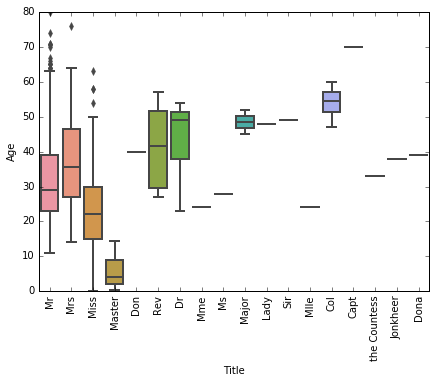

In [12]:
plt.figure(figsize=(7,5))
sns.boxplot(data=all_set[~all_set['Age'].isna()],x='Title',y='Age', linewidth=2)
plt.xticks(rotation=90)
plt.show()

我们观察了all_set中各个特征变量，从变量的实际含义来看，只有`Title`能够一定程度上反应乘客的年龄，从上图来看，不同`Title`分组，年龄中位数差异还是明显的，另外，除了Mr，Mrs，Miss分组的方差较大，其他的都比较能够接受。此外，Master的年龄范围为0-12，原作者将`Title`为**Master**的乘客身份确认为**boy**，认为比用`Age`来划分更为合理。

In [13]:
Age_Title = all_set.groupby('Title')['Age'].median()

In [14]:
before_impute = all_set.loc[~all_set['Age'].isna(),].copy()
all_set.loc[all_set['Age'].isna(),'Age'] = all_set.loc[all_set['Age'].isna(),'Title'].apply(lambda x: Age_Title[x])

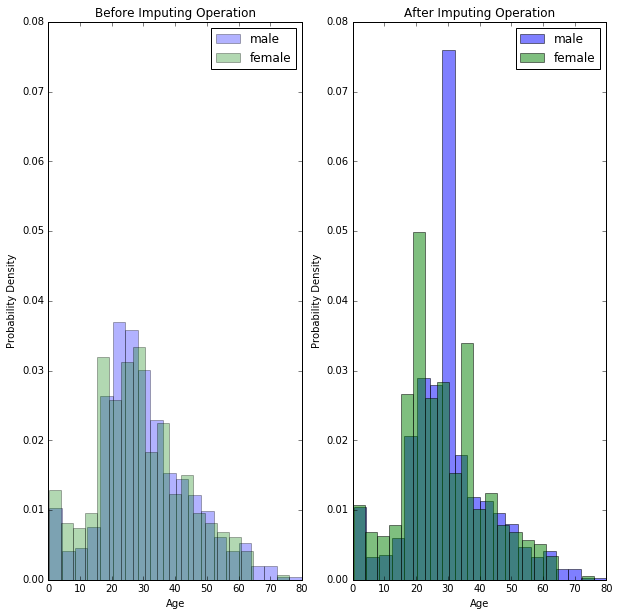

In [15]:
plt.figure(figsize=(10,10))
plt.subplot(121)
plt.hist(before_impute.loc[before_impute['Sex']=='male','Age'],bins=20,density=True,label='male',alpha=0.3)
plt.hist(before_impute.loc[before_impute['Sex']=='female','Age'],bins=20,density=True,label='female',alpha=0.3)
plt.legend(loc='upper right')
plt.xlabel('Age')
plt.ylabel('Probability Density')
plt.ylim([0,0.08])
plt.title('Before Imputing Operation')
plt.subplot(122)
plt.hist(all_set.loc[all_set['Sex']=='male','Age'],bins=20,density=True,label='male',alpha=0.5)
plt.hist(all_set.loc[all_set['Sex']=='female','Age'],bins=20,density=True,label='female',alpha=0.5)
plt.legend(loc='upper right')
plt.xlabel('Age')
plt.ylabel('Probability Density')
plt.ylim([0,0.08])
plt.title('After Imputing Operation')
plt.show()

### 填充缺失的`Embarked`和`Fare`数据

In [16]:
all_set.loc[all_set['Embarked'].isna()|all_set['Fare'].isna(),]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Surname,Title
61,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,62,1,female,0,1.0,11357X,Icard,Miss
829,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,female,0,1.0,11357X,Stone,Mrs
1043,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,NaN,370X,Storey,Mr


In [17]:
all_set.loc[all_set['Surname'].isin(['Icard','Stone','Storey']),]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Surname,Title
61,38.0,B28,NaN,80.0,"Icard, Miss. Amelie",0,62,1,female,0,1.0,11357X,Icard,Miss
829,62.0,B28,NaN,80.0,"Stone, Mrs. George Nelson (Martha Evelyn)",0,830,1,female,0,1.0,11357X,Stone,Mrs
1043,60.5,NaN,S,NaN,"Storey, Mr. Thomas",0,1044,3,male,0,NaN,370X,Storey,Mr


In [18]:
all_set.loc[all_set['Ticket'].isin(['1135XX','37XX']),]

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Surname,Title


我们发现，船上没有与上述三位缺失数据的乘客同姓的，也没有同一张船票的。因此，想通过同行人来填补缺失是不大可能的了。在这里，我们选择用`Pclass`等级为1的乘客`Embarked`的众数来填充缺失值，用`Pclass`等级为3的乘客的`Fare`的中位数来填充缺失值。

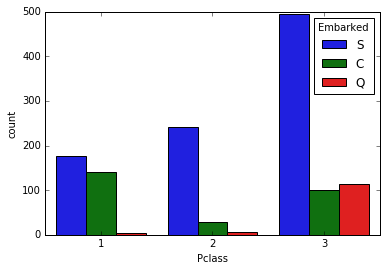

In [19]:
sns.countplot(data=all_set,x='Pclass',hue='Embarked')

In [20]:
all_set.loc[all_set['Embarked'].isna(),'Embarked'] = 'S'

In [21]:
all_set.groupby('Pclass')['Fare'].median()

Pclass
1    60.0000
2    15.0458
3     8.0500
Name: Fare, dtype: float64

In [22]:
all_set.loc[all_set['Fare'].isna(),'Fare'] = 8.0500

在作者最初的**WCG**模型中，仅用`Surname`判断乘客之间是否是同行的，后续补充了**TicketCheck**来检查同行之间的`Ticket`是否相同，如果不同，则分入`noGroup`。

In [23]:
display(all_set.iloc[[194,1066],])

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Surname,Title
194,44.0,B4,C,27.7208,"Brown, Mrs. James Joseph (Margaret Tobin)",0,195,1,female,0,1.0,PC 1761X,Brown,Mrs
1066,15.0,NaN,S,39.0000,"Brown, Miss. Edith Eileen",2,1067,2,female,0,NaN,2975X,Brown,Miss


从上面的这个例子可以清楚的了解到上述描述的情况，Surname为Brown的两位乘客，她们的Embarked,Pclass和Ticket都不同，很难认为这两位乘客是同行的。

### 创建新的特征GroupId，由Surname,Embarked,Pclass,Ticket组成

In [24]:
def Create_GroupId(raw):
    return str(raw['Surname']) + '-' + str(raw['Embarked']) + '-' + str(raw['Pclass']) + '-' + str(raw['Ticket']) + '-' + str(raw['Fare'])

In [25]:
all_set['GroupId'] = all_set.apply(Create_GroupId,axis=1)

In [26]:
display(all_set['GroupId'].value_counts().value_counts())

1     809
2     133
3      39
4      10
6       4
5       4
7       2
11      1
8       1
Name: GroupId, dtype: int64

Tansfrom `Title` to only contain `man`, `woman`, and `boy`

In [27]:
def transform_title(x):
    if x in ["Capt","Don","Major","Col","Rev","Dr","Sir","Mr","Jonkheer"]:
        return 'man'
    elif x in ["Dona","the Countess","Mme","Mlle","Ms","Miss","Lady","Mrs"]:
        return 'woman'
    elif x in ["Master"]:
        return 'boy'

In [28]:
all_set['Title'] = all_set['Title'].apply(transform_title)
display(all_set['Title'].value_counts())

man      783
woman    465
boy       61
Name: Title, dtype: int64

我们的目标是，在`Title`为`boy`的乘客中找出幸存者，在`Title`为`woman`的乘客中找出遇难者。

In [29]:
all_set['GroupCond'] = all_set['GroupId'].copy()
all_set.loc[all_set['Title'] == 'man','GroupCond'] = 'noGroup'

In [30]:
GroupCondFreq = all_set['GroupCond'].value_counts()
all_set['GroupCondFreq'] = all_set['GroupCond'].apply(lambda x: GroupCondFreq[x])

In [31]:
all_set.loc[all_set['GroupCondFreq']<=1,'GroupCond'] = 'noGroup'

In [32]:
display(all_set.head(4))

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Surname,Title,GroupId,GroupCond,GroupCondFreq
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 2117X,Braund,man,Braund-S-3-A/5 2117X-7.25,noGroup,783
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 1759X,Cumings,woman,Cumings-C-1-PC 1759X-71.2833,noGroup,1
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 310128X,Heikkinen,woman,Heikkinen-S-3-STON/O2. 310128X-7.925,noGroup,1
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,11380X,Futrelle,woman,Futrelle-S-1-11380X-53.1,noGroup,1


在分析数据过程中作者发现，有些家庭会携带保姆或者佣人，或者非同姓的相关人员同行，他们的Ticket，Embarked，Pclass可能是完全相同的，他们的GroupId由于Surname不同，导致了没有分在同一个组内。以此，应该将这部分的乘客也挖掘出来，进一步提高预测精度。

In [33]:
def Create_TicketId(raw):
    return str(raw['Embarked']) + '-' + str(raw['Pclass']) + '-' + str(raw['Ticket']) + '-' + str(raw['Fare'])

In [34]:
all_set['TicketId'] = all_set.apply(Create_TicketId,axis=1)

In [35]:
display(all_set.head(4))

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Surname,Title,GroupId,GroupCond,GroupCondFreq,TicketId
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 2117X,Braund,man,Braund-S-3-A/5 2117X-7.25,noGroup,783,S-3-A/5 2117X-7.25
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 1759X,Cumings,woman,Cumings-C-1-PC 1759X-71.2833,noGroup,1,C-1-PC 1759X-71.2833
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 310128X,Heikkinen,woman,Heikkinen-S-3-STON/O2. 310128X-7.925,noGroup,1,S-3-STON/O2. 310128X-7.925
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,11380X,Futrelle,woman,Futrelle-S-1-11380X-53.1,noGroup,1,S-1-11380X-53.1


In [36]:
def checkTicketId(all_data, x):
    re_set = all_data[all_data['Name']!=x['Name']]
    if (x['Title']!='man')&(x['GroupCond']=='noGroup'):
        if len(re_set.loc[re_set['TicketId']==x['TicketId'],])>0:
            return re_set.loc[re_set['TicketId']==x['TicketId'],'GroupId'].mode()[0]
        else:
            return x['GroupId']
    else:
        return x['GroupId']
all_set['GroupId'] = all_set.apply(lambda x: checkTicketId(all_set,x),axis=1)

In [37]:
display(all_set.head(4))

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Surname,Title,GroupId,GroupCond,GroupCondFreq,TicketId
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 2117X,Braund,man,Braund-S-3-A/5 2117X-7.25,noGroup,783,S-3-A/5 2117X-7.25
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 1759X,Cumings,woman,Cumings-C-1-PC 1759X-71.2833,noGroup,1,C-1-PC 1759X-71.2833
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 310128X,Heikkinen,woman,Honkanen-S-3-STON/O2. 310128X-7.925,noGroup,1,S-3-STON/O2. 310128X-7.925
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,11380X,Futrelle,woman,Chambers-S-1-11380X-53.1,noGroup,1,S-1-11380X-53.1


In [38]:
GroupIdFreq = all_set['GroupId'].value_counts()

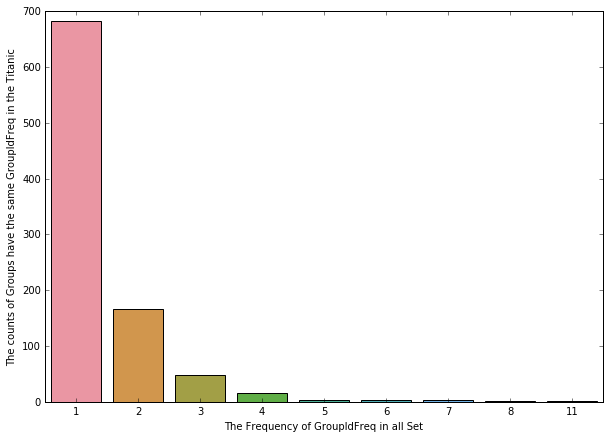

In [39]:
GroupIdFreqCounts = GroupIdFreq.value_counts()
plt.figure(figsize=(10,7))
sns.barplot(GroupIdFreqCounts.index,GroupIdFreqCounts.values)
plt.xlabel('The Frequency of GroupIdFreq in all Set')
plt.ylabel('The counts of Groups have the same GroupIdFreq in the Titanic')
plt.grid(axis=1)
plt.show()

In [40]:
all_set['GroupCond'] = all_set['GroupId'].copy()
all_set.loc[all_set['Title'] == 'man','GroupCond'] = 'noGroup'
GroupCondFreq = all_set['GroupCond'].value_counts()
all_set['GroupCondFreq'] = all_set['GroupCond'].apply(lambda x: GroupCondFreq[x])
all_set.loc[all_set['GroupCondFreq']<=1,'GroupCond'] = 'noGroup'
GroupCondFreq = all_set['GroupCond'].value_counts()
all_set['GroupCondFreq'] = all_set['GroupCond'].apply(lambda x: GroupCondFreq[x])

In [41]:
GroupCondSurvival = all_set.groupby('GroupCond')['Survived'].agg('mean')

In [42]:
display(GroupCondSurvival.value_counts().sort_index(ascending=False))

1.000000    69
0.750000     1
0.500000     3
0.311429     1
0.000000    23
Name: Survived, dtype: int64

In [43]:
all_set['GroupCondSurvival'] = all_set['GroupCond'].apply(lambda x: GroupCondSurvival[x])

In [44]:
GroupCondSurvival_0 = pd.DataFrame()
for GroupCond in sorted(all_set.loc[all_set['GroupCondSurvival']==0,'GroupCond'].unique()):
    GroupCondSurvival_0 = pd.concat([GroupCondSurvival_0,all_set[all_set['GroupCond'] == GroupCond]])
GroupCondSurvival_0.to_csv('GroupCondSurvival_0.csv',index=False)

In [45]:
GroupCondSurvival_1 = pd.DataFrame()
for GroupCond in sorted(all_set.loc[all_set['GroupCondSurvival']==1,'GroupCond'].unique()):
    GroupCondSurvival_1 = pd.concat([GroupCondSurvival_1,all_set[all_set['GroupCond'] == GroupCond]])
GroupCondSurvival_1.to_csv('GroupCondSurvival_1.csv',index=False)

In [46]:
display((all_set.loc[all_set['GroupCondSurvival']==1/2,['Surname','Title','Survived','GroupCond']]))

,Surname,Title,Survived,GroupCond
297,Allison,woman,0.0,Allison-S-1-11378X-151.55
305,Allison,boy,1.0,Allison-S-1-11378X-151.55
312,Lahtinen,woman,0.0,Lahtinen-S-2-25065X-26.0
427,Phillips,woman,1.0,Lahtinen-S-2-25065X-26.0
498,Allison,woman,0.0,Allison-S-1-11378X-151.55
554,Ohman,woman,1.0,Henriksson-S-3-34708X-7.775
708,Cleaver,woman,1.0,Allison-S-1-11378X-151.55
807,Pettersson,woman,0.0,Henriksson-S-3-34708X-7.775
1032,Daniels,woman,NaN,Allison-S-1-11378X-151.55


In [47]:
display((all_set.loc[all_set['GroupCondSurvival']==3/4,['Surname','Title','Survived','GroupCond']]))

,Surname,Title,Survived,GroupCond
25,Asplund,woman,1.0,Asplund-S-3-34707X-31.3875
182,Asplund,boy,0.0,Asplund-S-3-34707X-31.3875
233,Asplund,woman,1.0,Asplund-S-3-34707X-31.3875
261,Asplund,boy,1.0,Asplund-S-3-34707X-31.3875
1045,Asplund,boy,NaN,Asplund-S-3-34707X-31.3875
1270,Asplund,boy,NaN,Asplund-S-3-34707X-31.3875


In [48]:
all_set['Predict'] = 0
all_set.loc[all_set['Title']=='woman','Predict'] = 1
all_set.loc[(all_set['Title']=='boy')&(all_set['GroupCondSurvival']==1),'Predict'] = 1
all_set.loc[(all_set['Title']=='woman')&(all_set['GroupCondSurvival']==0),'Predict'] = 0

In [49]:
def Predict_axis(x):
    if x == 1:
        return 0.55+0.4*np.random.rand()
    elif x==0:
        return 0.05+0.4*np.random.rand()

In [50]:
train_set = all_set.loc[~all_set['Survived'].isna(),]

In [51]:
train_set['Predict_axis'] = train_set['Predict'].apply(Predict_axis)

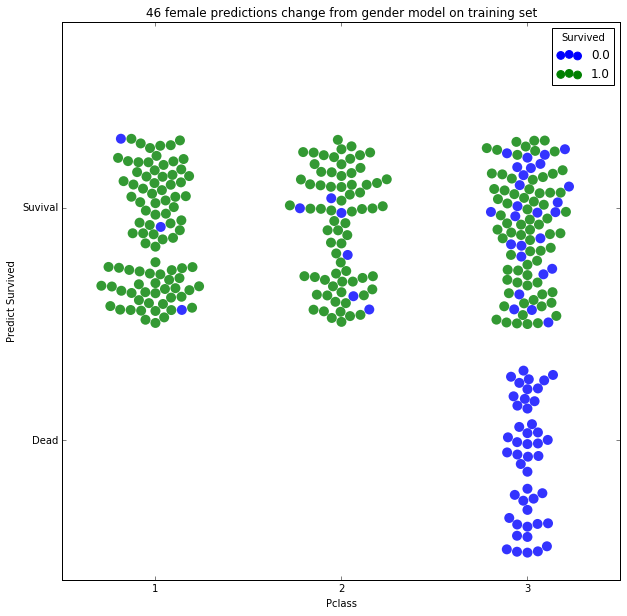

Pclass  Predict  Survived
1       1        0.0          3
                 1.0         90
2       1        0.0          6
                 1.0         70
3       0        0.0         46
        1        0.0         26
                 1.0         72
Name: Survived, dtype: int64

In [52]:
plt.figure(figsize=(10,10))
sns.swarmplot(data=train_set[train_set['Title']=='woman'],x='Pclass',y='Predict_axis',hue='Survived',alpha=0.8,dodge=False,size=10)
plt.yticks([0.3,0.8],['Dead','Suvival'])
plt.xlabel('Pclass')
plt.ylabel('Predict Survived')
plt.title('46 female predictions change from gender model on training set')
plt.show()
display(train_set[train_set['Title']=='woman'].groupby(['Pclass','Predict','Survived'])['Survived'].count())

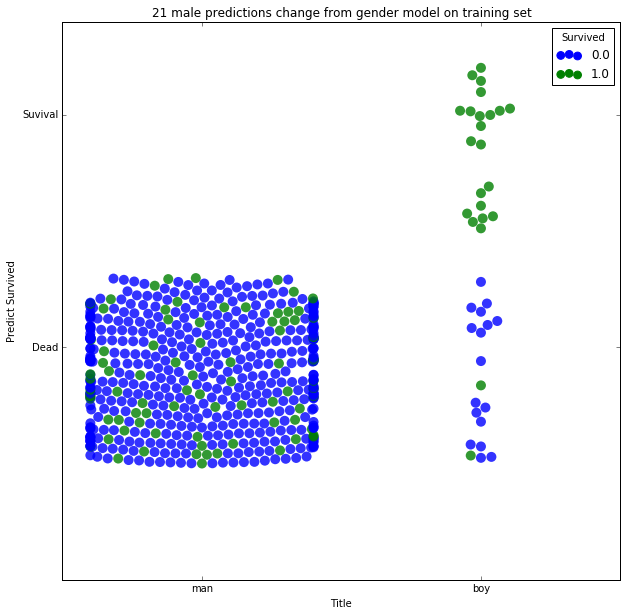

Title  Predict  Survived
boy    0        0.0          17
                1.0           2
       1        1.0          21
man    0        0.0         451
                1.0          87
Name: Survived, dtype: int64

In [53]:
plt.figure(figsize=(10,10))
sns.swarmplot(data=train_set[train_set['Title']!='woman'],x='Title',y='Predict_axis',hue='Survived',alpha=0.8,dodge=False,size=10)
plt.yticks([0.3,0.8],['Dead','Suvival'])
plt.xlabel('Title')
plt.ylabel('Predict Survived')
plt.title('21 male predictions change from gender model on training set')
plt.show()
display(train_set[train_set['Title']!='woman'].groupby(['Title','Predict','Survived'])['Survived'].count())

### Validation operation

In [54]:
import sklearn
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

In [55]:
all_data = pd.read_csv('data/train.csv')
CV = 10
epochs = 10
for epoch in range(epochs):
    TrainAccuracy = []
    ValidAccuracy = []
    kfold = StratifiedKFold(n_splits=CV,shuffle=True)
    for train_idx,valid_idx in kfold.split(all_data,all_data['Survived']):
        all_data['Title'] = all_data['Name'].apply(lambda x: str(x).split(', ')[1].split('.')[0])
        all_data['Title'] = all_data['Title'].apply(transform_title)

        all_data['Ticket'] = all_data['Ticket'].apply(transform_ticket)

        all_data['Surname'] = all_data['Name'].apply(lambda x: str(x).split(',')[0])
        all_data['GroupId'] = all_data.apply(Create_GroupId,axis=1)
        all_data['GroupCond'] = all_data['GroupId'].copy()
        all_data.loc[all_data['Title']=='man','GroupCond'] = 'noGroup'
        
        GroupCondFreq = all_data['GroupCond'].value_counts()
        all_data['GroupCondFreq'] = all_data['GroupCond'].apply(lambda x: GroupCondFreq[x])
        all_data.loc[all_data['GroupCondFreq']<=1,'GroupCond'] = 'noGroup'
        
        all_data['TicketId'] = all_data.apply(Create_TicketId,axis=1)
        all_data['GroupId'] = all_data.apply(lambda x: checkTicketId(all_set,x),axis=1)
        
        
        all_data['GroupCond'] = all_data['GroupId'].copy()
        all_data.loc[all_data['Title'] == 'man','GroupCond'] = 'noGroup'
        GroupCondFreq = all_data['GroupCond'].value_counts()
        all_data['GroupCondFreq'] = all_data['GroupCond'].apply(lambda x: GroupCondFreq[x])
        all_data.loc[all_data['GroupCondFreq']<=1,'GroupCond'] = 'noGroup'
        GroupCondFreq = all_data['GroupCond'].value_counts()
        all_data['GroupCondFreq'] = all_data['GroupCond'].apply(lambda x: GroupCondFreq[x])
        
        validation = all_data.iloc[valid_idx]['Survived']
        GroupCondSurvival = all_data.groupby('GroupCond')['Survived'].agg('mean')

        all_data['GroupCondSurvival'] = all_data['GroupCond'].apply(lambda x: GroupCondSurvival[x])

        all_data['Predict'] = 0
        all_data.loc[all_data['Title']=='woman','Predict'] = 1
        all_data.loc[(all_data['Title']=='boy')&(all_data['GroupCondSurvival']==1),'Predict'] = 1
        all_data.loc[(all_data['Title']=='woman')&(all_data['GroupCondSurvival']==0),'Predict'] = 0

        train = all_data.iloc[train_idx][['Predict','Survived']]
        valid = all_data.iloc[valid_idx][['Predict','Survived']]

        TrainAccuracy.append(accuracy_score(y_true=train['Survived'],y_pred=train['Predict']))
        ValidAccuracy.append(accuracy_score(y_true=valid['Survived'],y_pred=valid['Predict']))
    print('Trial {} {}-fold Cross-Validation:'.format(epoch+1,CV))
    print('The training accuracy = {:.2f}%(+-{:.2f}%)'.format(np.mean(TrainAccuracy)*100,np.std(TrainAccuracy)*100))
    print('The validation accuracy = {:.2f}%(+-{:.2f}%)'.format(np.mean(ValidAccuracy)*100,np.std(ValidAccuracy)*100))
    print('*'*80)
    print()

Trial 1 10-fold Cross-Validation:
The training accuracy = 84.85%(+-0.39%)
The validation accuracy = 84.85%(+-3.50%)
********************************************************************************

Trial 2 10-fold Cross-Validation:
The training accuracy = 84.85%(+-0.29%)
The validation accuracy = 84.85%(+-2.59%)
********************************************************************************

Trial 3 10-fold Cross-Validation:
The training accuracy = 84.85%(+-0.46%)
The validation accuracy = 84.85%(+-4.11%)
********************************************************************************

Trial 4 10-fold Cross-Validation:
The training accuracy = 84.85%(+-0.24%)
The validation accuracy = 84.86%(+-2.14%)
********************************************************************************

Trial 5 10-fold Cross-Validation:
The training accuracy = 84.85%(+-0.46%)
The validation accuracy = 84.86%(+-4.18%)
********************************************************************************

Trial 6 10

In [56]:
print('The training accuracy = {:.2f}%(+-{:.2f}%)'.format(np.mean(TrainAccuracy)*100,np.std(TrainAccuracy)*100))
print('The validation accuracy = {:.2f}%(+-{:.2f}%)'.format(np.mean(ValidAccuracy)*100,np.std(ValidAccuracy)*100))

The training accuracy = 84.85%(+-0.34%)
The validation accuracy = 84.85%(+-3.10%)


### predict testSet

### make submission

In [57]:
testSet = all_set[all_set['Survived'].isna()]
submit = pd.DataFrame({'PassengerId': testSet['PassengerId'],'Survived':testSet['Predict']})
submit.to_csv('GenderGroupId-20180807.csv',index=False)

## RandomForest

In [68]:
print(all_set.columns)

Index(['Age', 'Cabin', 'Embarked', 'Fare', 'Name', 'Parch', 'PassengerId',
       'Pclass', 'Sex', 'SibSp', 'Survived', 'Ticket', 'Surname', 'Title',
       'GroupId', 'GroupCond', 'GroupCondFreq', 'TicketId',
       'GroupCondSurvival', 'Predict'],
      dtype='object')


In [69]:
all_set['AgeBin'] = pd.cut(x=all_data['Age'],bins=6)

In [70]:
all_set['FareBin'] = pd.cut(x=all_data['Fare'],bins=6)

In [78]:
rf_X = all_set[['Pclass','Sex','AgeBin','FareBin','Embarked','Title','GroupId','GroupCond','GroupCondFreq','TicketId','GroupCondSurvival']].copy()
rf_X = rf_X.astype('str')
rf_y = all_set['Survived']
rf_X = pd.get_dummies(rf_X)
print(rf_X.shape)

(1309, 1731)


In [103]:
train_idx = (~rf_y.isna())
test_idx = (rf_y.isna())
rf_X_train = rf_X[train_idx]
rf_X_test = rf_X[test_idx]
rf_y_train = rf_y[train_idx]
rf_y_test = rf_y[test_idx]

In [84]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [96]:
rf = RandomForestClassifier(oob_score=True,random_state=2018,verbose=1)

In [97]:
param_grid = {'max_depth':[5,7,9],'max_features':[0.3,0.5,0.7],'n_estimators':[500]}

In [98]:
grid_search = GridSearchCV(estimator=rf,param_grid=param_grid,cv=5,scoring='accuracy',verbose=2)

In [99]:
grid_search.fit(rf_X_train,rf_y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    1.6s finished
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    1.6s finished
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    1.6s finished
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    1.5s finished
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]

[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    5.5s finished
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:   11.0s finished
[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:   10.5s finished
[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:   10.5s finished
[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:   10.5s finished
[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:    0.0s f

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    3.5s finished
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    3.3s finished
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    9.5s finished
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    6.5s finished
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done 1000 out of 1000 | elapsed:    0.0s finished
[Paralle

[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:   11.1s finished
[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:   11.5s finished
[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:   11.7s finished
[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:   11.5s finished
[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Done 2000 out of 2000 | elapsed:    0.1s finished
[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    3.3s fin

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=True, random_state=2018, verbose=1, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [5, 7, 9], 'max_features': [0.3, 0.5, 0.7], 'n_estimators': [500, 1000, 2000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=1)

In [108]:
Predictions = grid_search.predict(rf_X_test)

[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:    0.0s finished


In [109]:
submit = pd.DataFrame({'PassengerId': testSet['PassengerId'],'Survived': Predictions.astype(int)})
submit.to_csv('GenderGroupId-20180807-RF.csv',index=False)

In [110]:
grid_search.best_params_

{'max_depth': 5, 'max_features': 0.3, 'n_estimators': 500}